In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv('crop_production.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [86]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [87]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [88]:
df.duplicated().sum()

0

In [89]:
df.State_Name.value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [90]:
a=[i.lower() for i in df['Crop'].unique()]
a.sort()
a

['apple',
 'arcanut (processed)',
 'arecanut',
 'arhar/tur',
 'ash gourd',
 'atcanut (raw)',
 'bajra',
 'banana',
 'barley',
 'bean',
 'beans & mutter(vegetable)',
 'beet root',
 'ber',
 'bhindi',
 'bitter gourd',
 'black pepper',
 'blackgram',
 'bottle gourd',
 'brinjal',
 'cabbage',
 'cardamom',
 'carrot',
 'cashewnut',
 'cashewnut processed',
 'cashewnut raw',
 'castor seed',
 'cauliflower',
 'citrus fruit',
 'coconut ',
 'coffee',
 'colocosia',
 'cond-spcs other',
 'coriander',
 'cotton(lint)',
 'cowpea(lobia)',
 'cucumber',
 'drum stick',
 'dry chillies',
 'dry ginger',
 'garlic',
 'ginger',
 'gram',
 'grapes',
 'groundnut',
 'guar seed',
 'horse-gram',
 'jack fruit',
 'jobster',
 'jowar',
 'jute',
 'jute & mesta',
 'kapas',
 'khesari',
 'korra',
 'lab-lab',
 'lemon',
 'lentil',
 'linseed',
 'litchi',
 'maize',
 'mango',
 'masoor',
 'mesta',
 'moong(green gram)',
 'moth',
 'niger seed',
 'oilseeds total',
 'onion',
 'orange',
 'other  rabi pulses',
 'other cereals & millets',
 'ot

In [91]:
df.Season.value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [92]:
df.Crop.value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

### EDA

### Top Grown Crops in all India by count

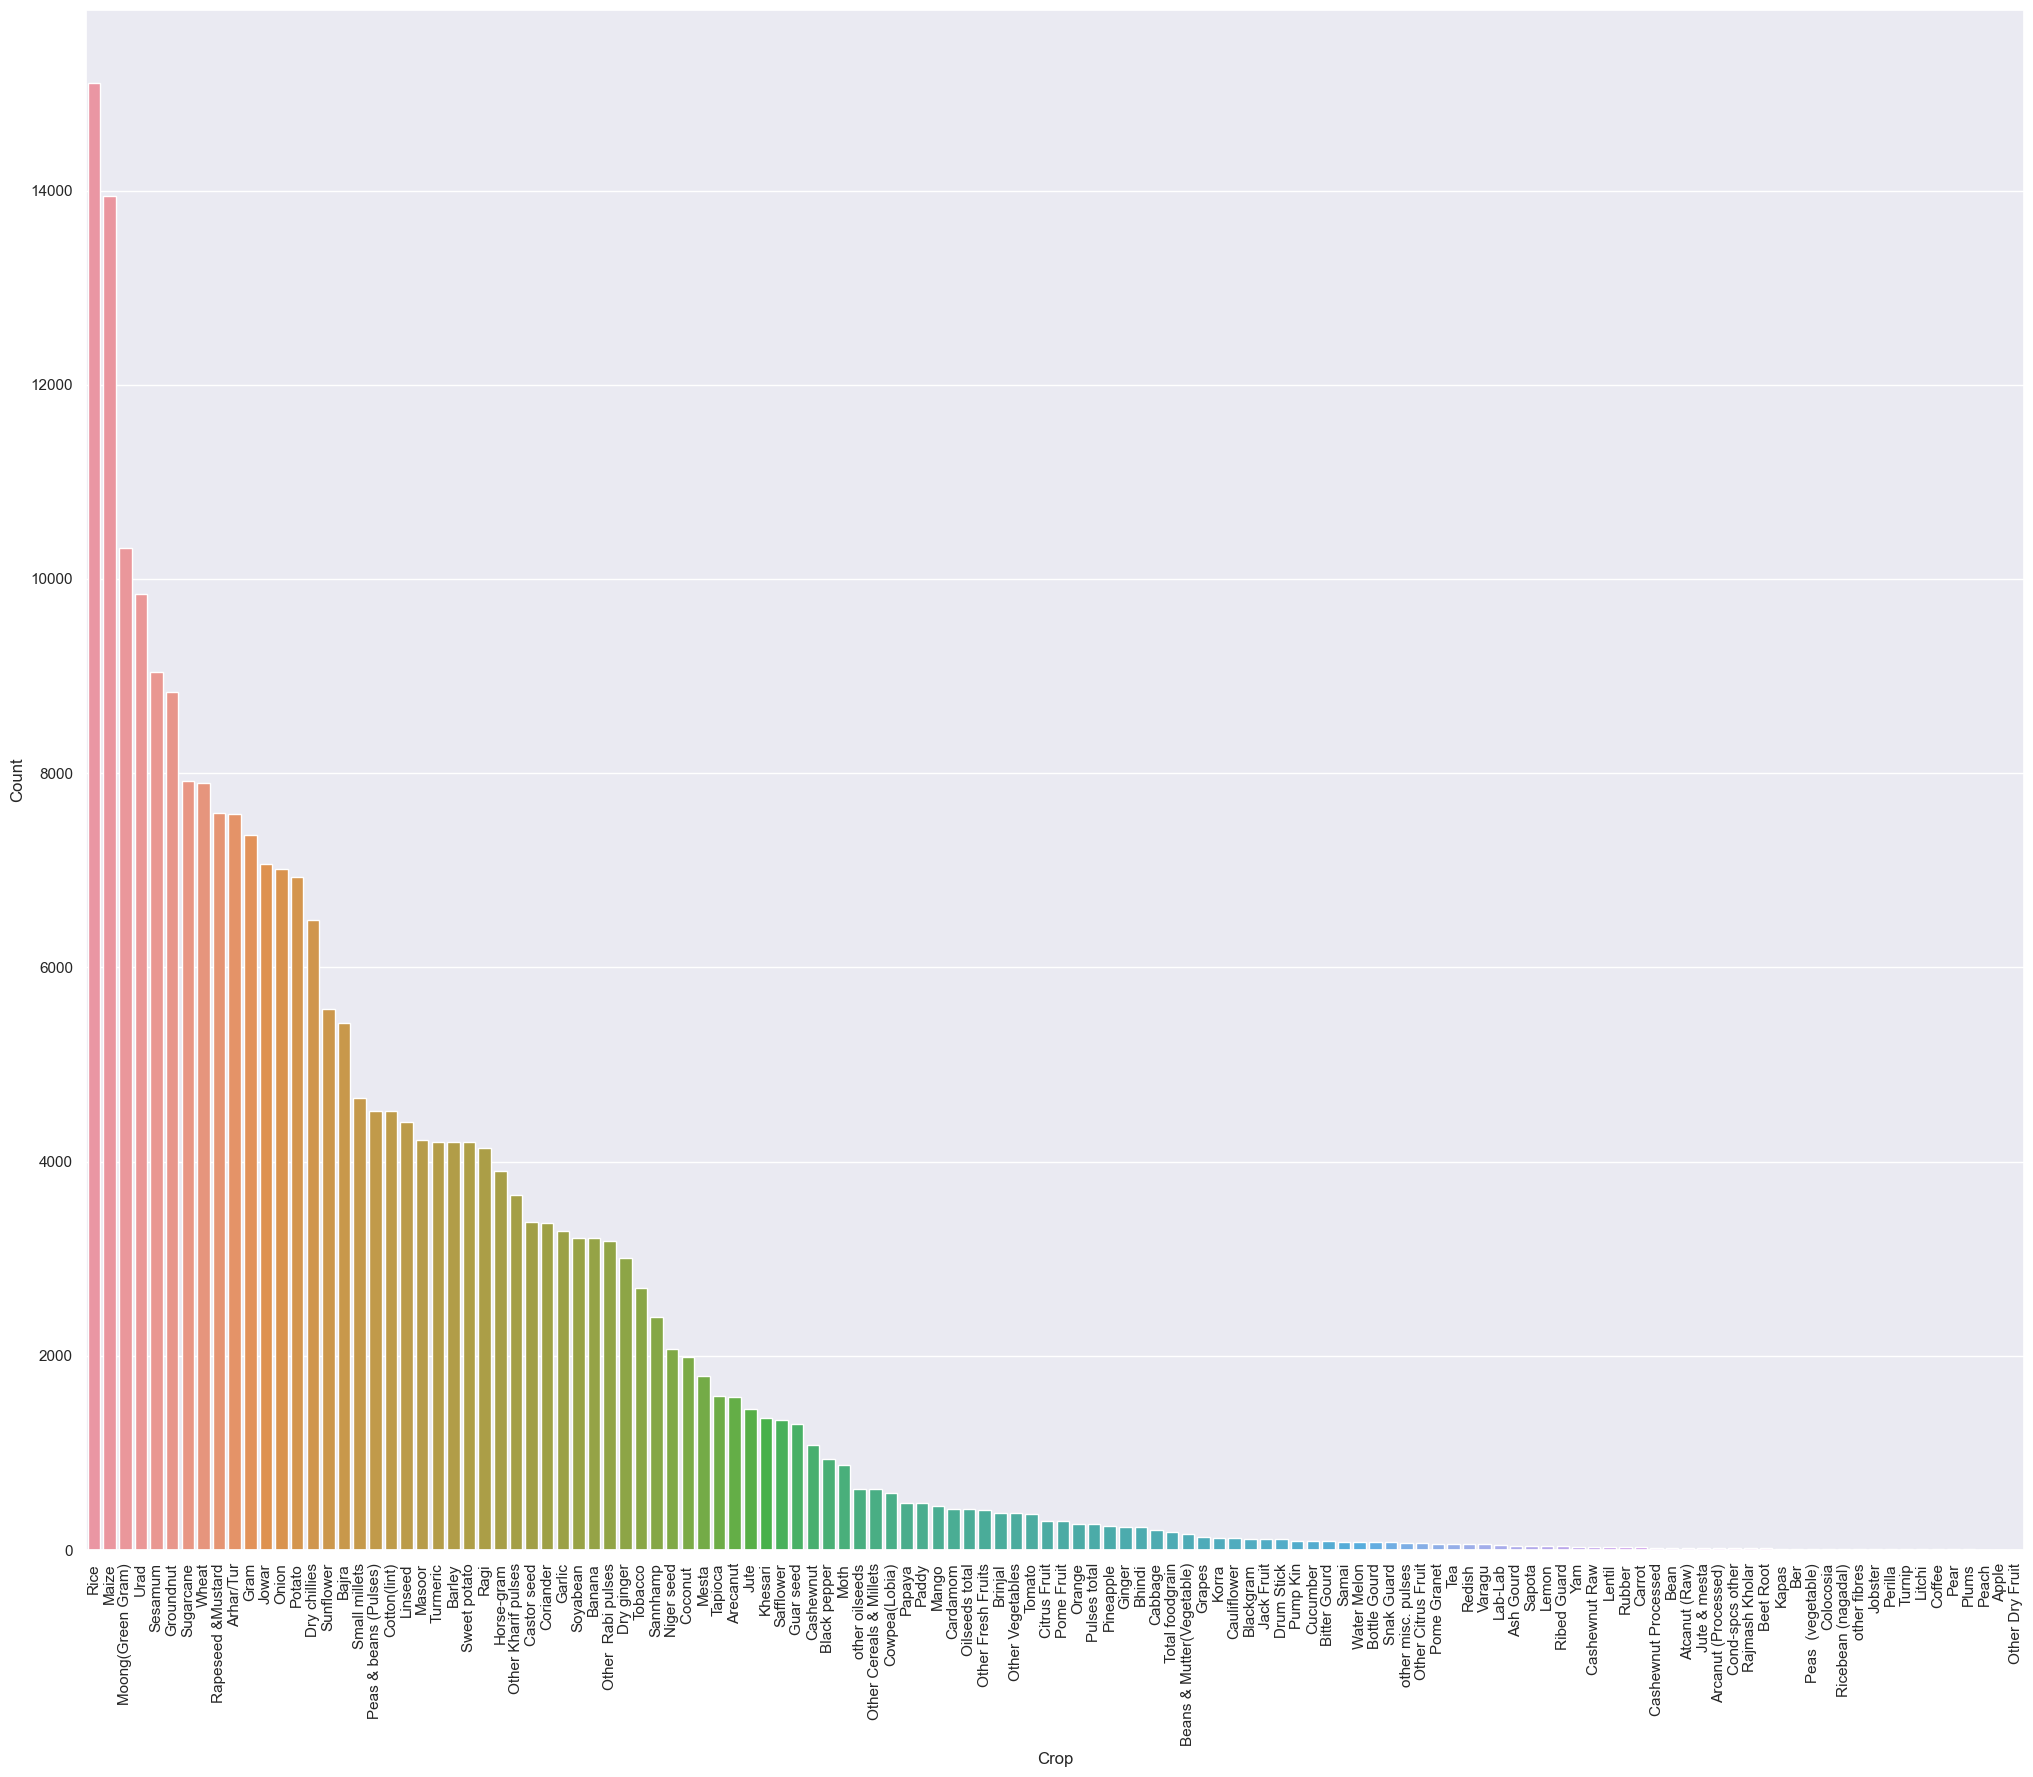

In [105]:
count = df.groupby('Crop').Crop.count().sort_values(ascending=False).to_frame()
count.rename(columns={'Crop':"Count"},inplace=True)
count = count.reset_index()
sns.set(rc={"figure.figsize" :(25,20)})
ax = sns.barplot(data=count,x='Crop',y='Count')
ax.tick_params(axis='x',rotation=90)

Rice is highest grown crop in india

### Top 10 State in india in agricultural area

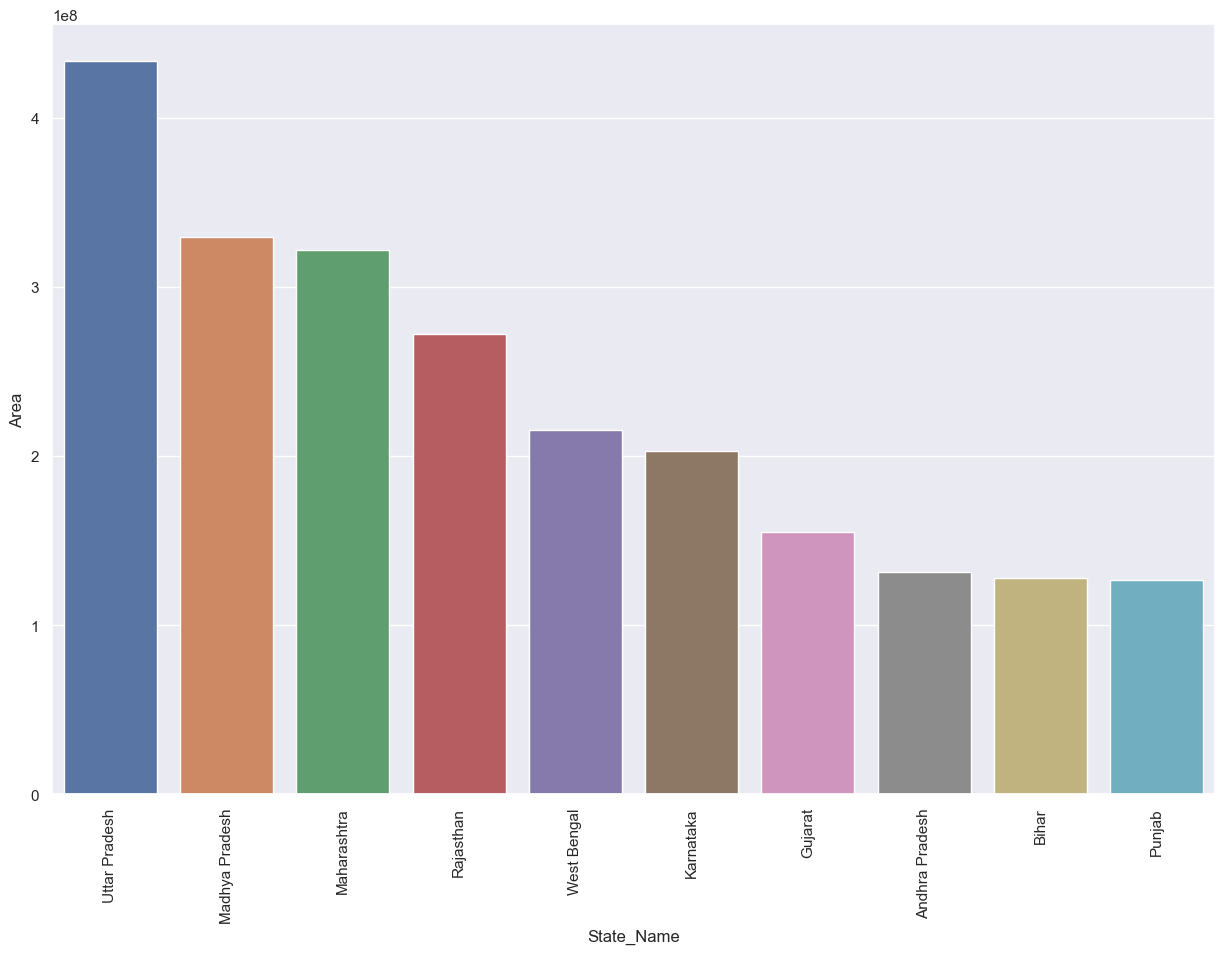

In [94]:
tc = df.groupby(['State_Name'])['Area'].sum().sort_values(ascending=False).nlargest(10).to_frame()
tc = tc.reset_index()
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=tc,x='State_Name',y='Area')
ax.tick_params(axis='x',rotation=90)

From above we can conclude that states which have larger land mass tend to more agricultural areas

### Top 10 districts in india in agricultural area

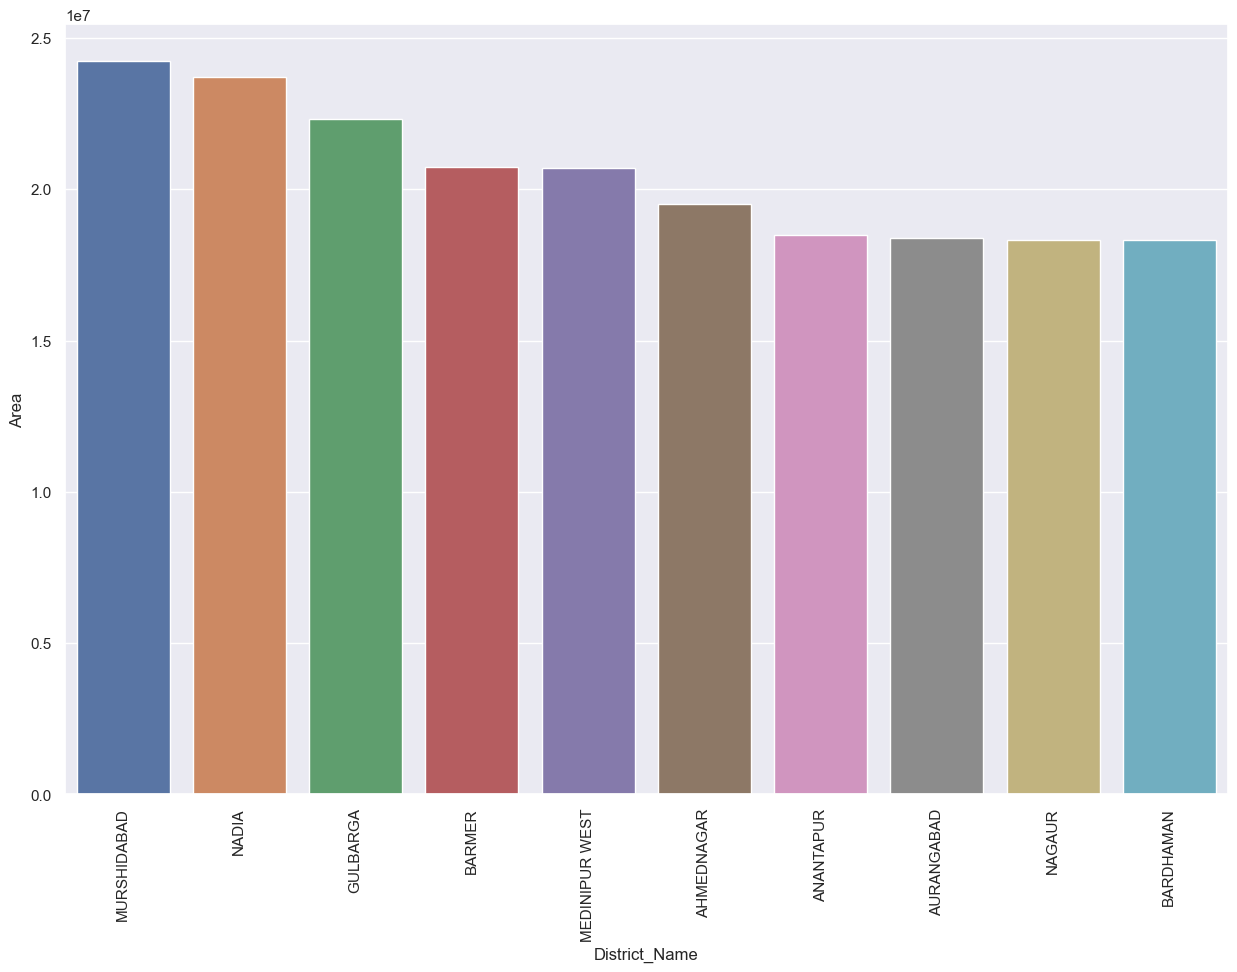

In [95]:
tc = df.groupby(['District_Name'])['Area'].sum().sort_values(ascending=False).nlargest(10).to_frame()
tc = tc.reset_index()
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=tc,x='District_Name',y='Area')
ax.tick_params(axis='x',rotation=90)

### Top 10 States which have least number of area of agricultural


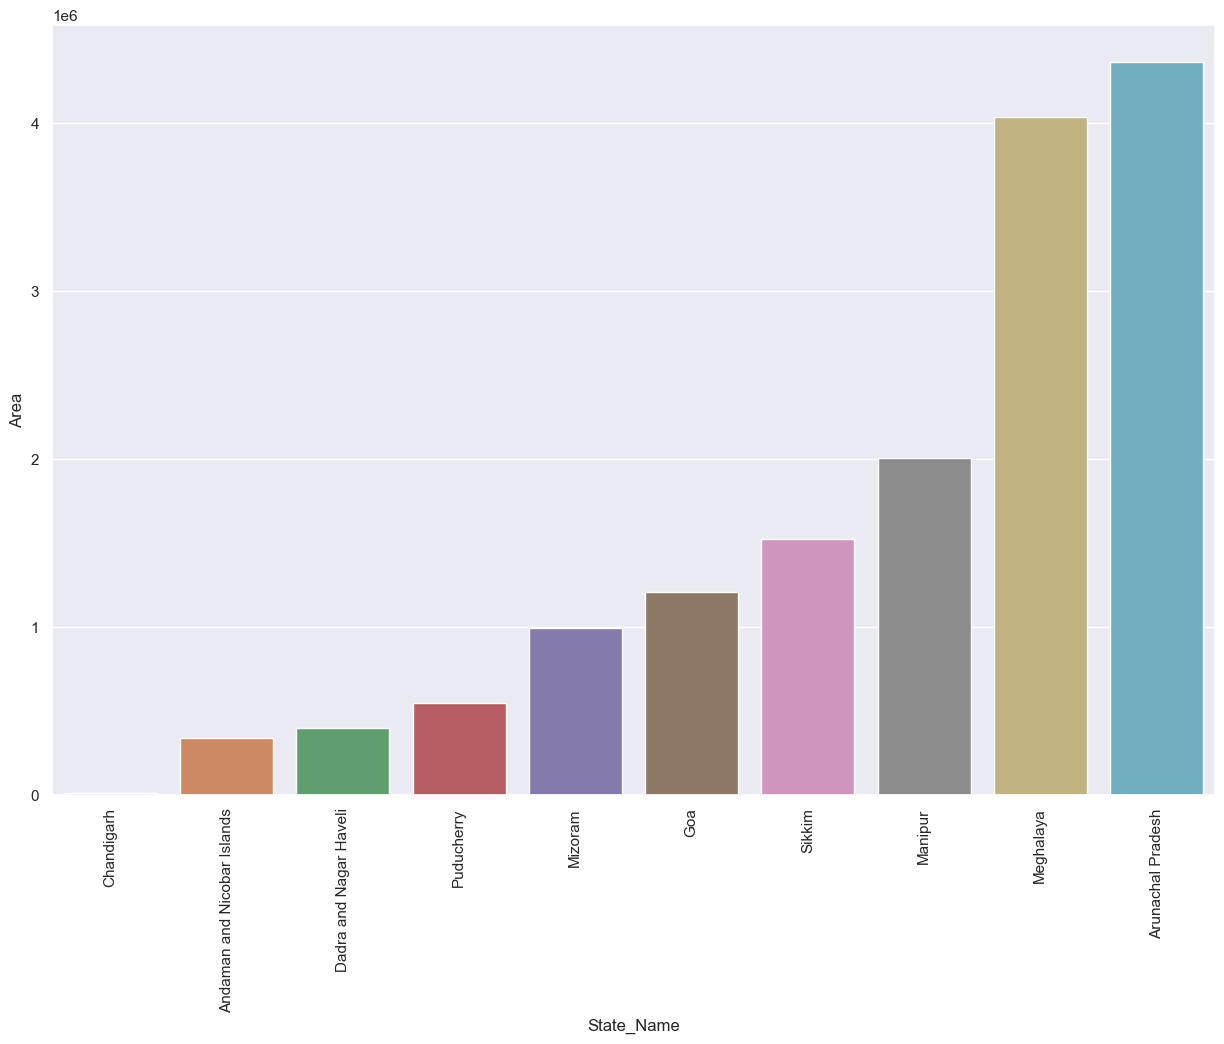

In [96]:
tc = df.groupby(['State_Name'])['Area'].sum().sort_values(ascending=False).nsmallest(10).to_frame()
tc = tc.reset_index()
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=tc,x='State_Name',y='Area')
ax.tick_params(axis='x',rotation=90)

All above are either Union Territories or small states so Agricultural productions is low

### Top 10 district which have least number of area of agricultural

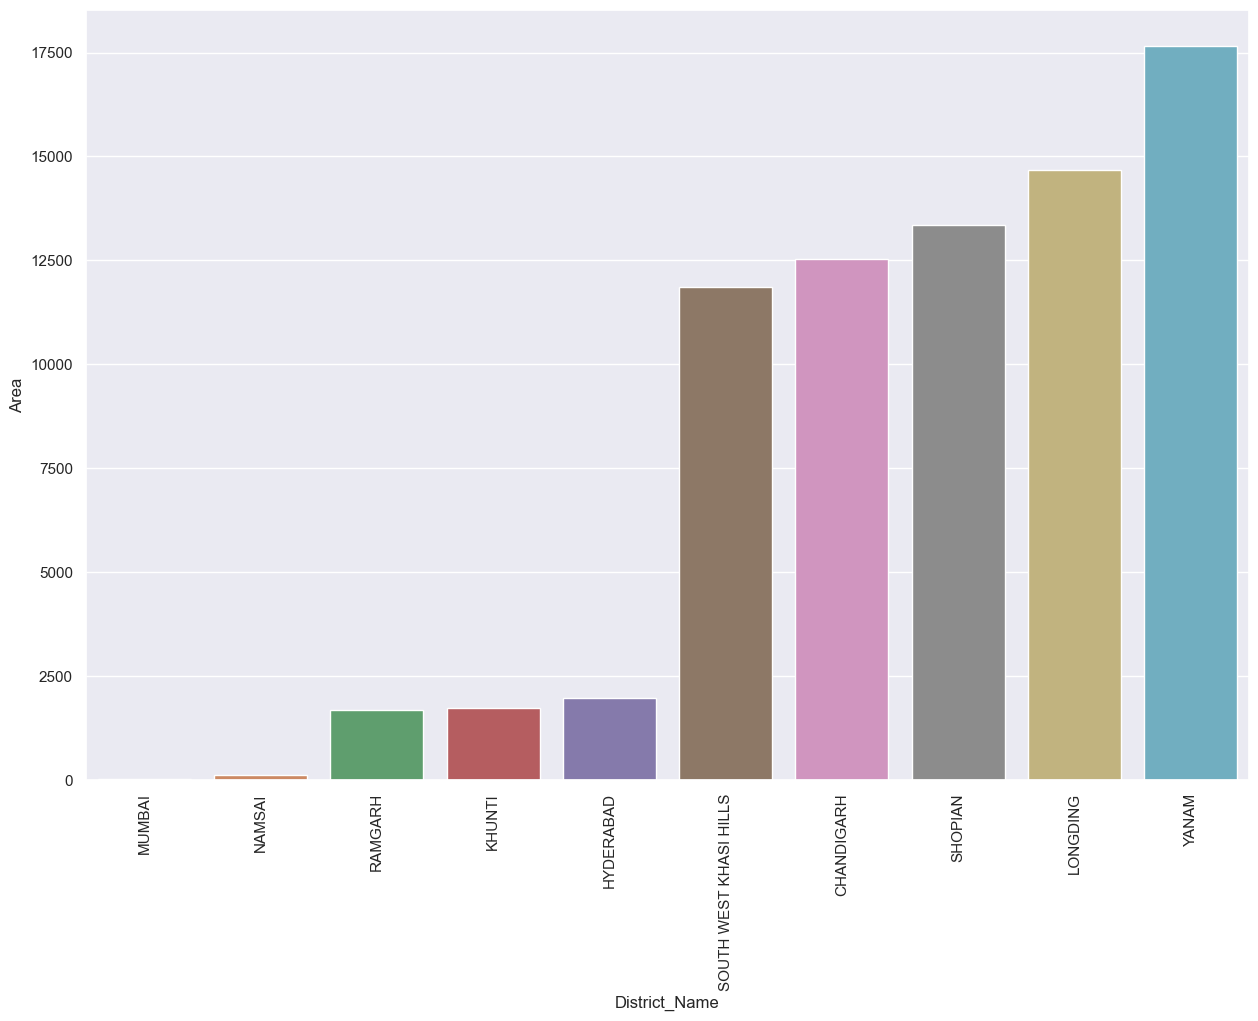

In [97]:
tc = df.groupby(['District_Name'])['Area'].sum().sort_values(ascending=False).nsmallest(10).to_frame()
tc = tc.reset_index()
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=tc,x='District_Name',y='Area')
ax.tick_params(axis='x',rotation=90)

Above district either Metropolitan Areas or very samll districts so Area of Agriculture is low

### Top Crops for each state by thier Production

We don't consider Coconut and Sugarcane because their production are not measured in same units as other crops

In [98]:
ff=df.copy()
ff.head()
ff=ff.loc[~ff.Crop.isin(["Coconut ","Sugarcane"])]

In [99]:
gg=ff.groupby(["State_Name","Crop"])["Production"].sum().to_frame().reset_index()
gg.sort_values(by=["Crop","Production"], ascending=False)
hh=gg.groupby("State_Name")["Crop","Production"].apply(lambda x:x.nlargest(1,columns=["Production"])).reset_index()
print("Top Crops in each state by thier Production\n")
hh

Top Crops in each state by thier Production



,State_Name,level_1,Crop,Production
0,Andaman and Nicobar Islands,11,Rice,2.230061e+05
1,Andhra Pradesh,65,Rice,1.437425e+08
2,Arunachal Pradesh,93,Rice,2.709477e+06
3,Assam,127,Rice,7.180109e+07
4,Bihar,167,Rice,9.202292e+07
5,Chandigarh,189,Wheat,3.946500e+04
6,Chhattisgarh,221,Rice,8.149862e+07
7,Dadra and Nagar Haveli,246,Rice,4.548650e+05
8,Goa,265,Rice,1.432244e+06
9,Gujarat,270,Cotton(lint),8.577750e+07


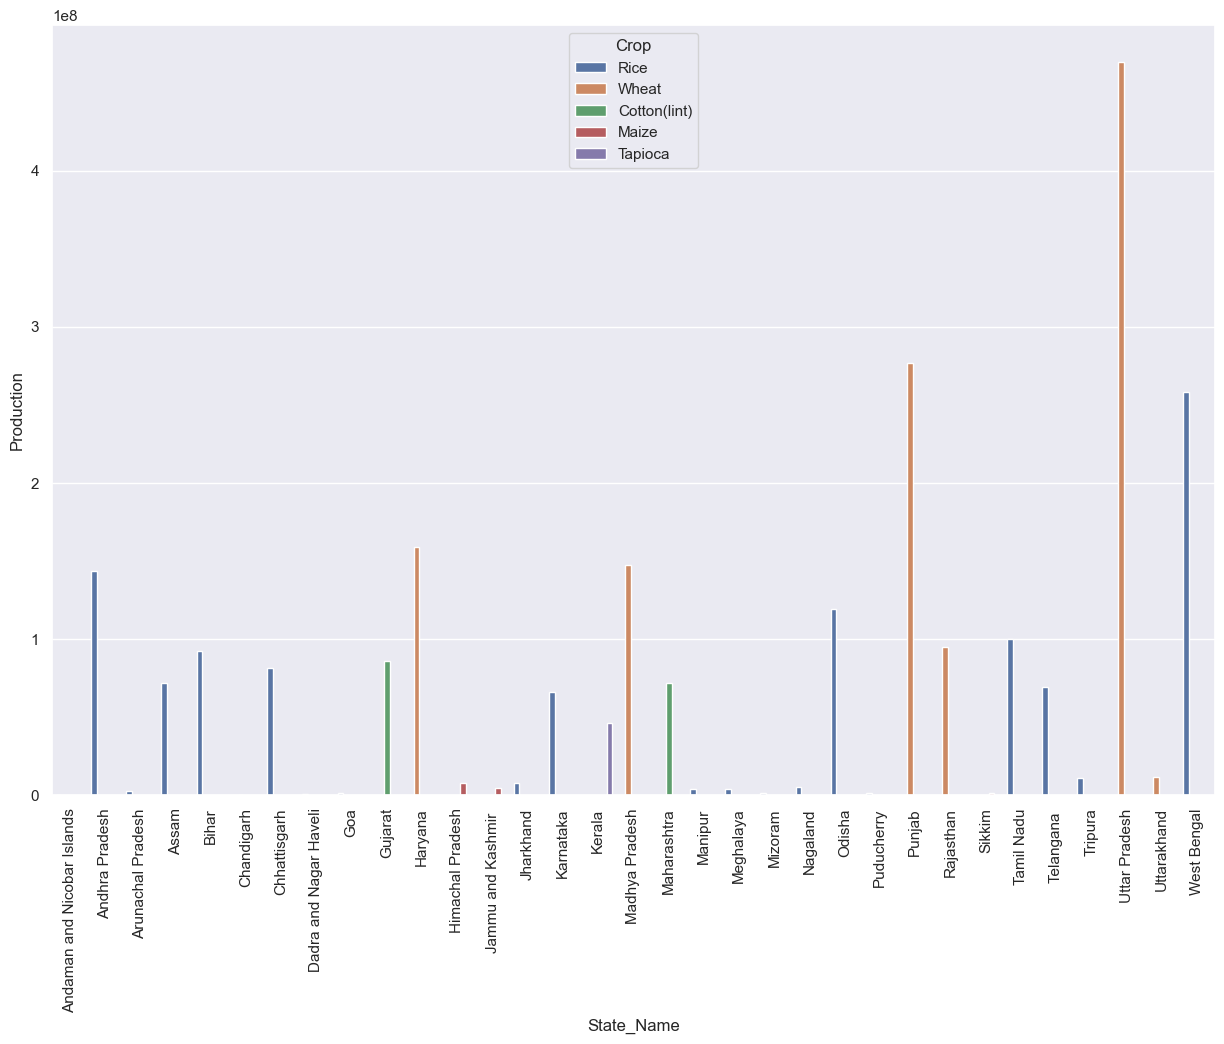

In [100]:
ax = sns.barplot(data=hh,x='State_Name',y='Production',hue='Crop')
ax.tick_params(axis='x',rotation=90)

UP has highest Production in Rice compared to any other crop in any other state

### Production of each crop over the years

Since Rice is highly grown crop in india, we choose Rice here, you can choose any crop you want

In [101]:
def crop(x):
    x1=df[df['Crop']==x]
    year=x1.groupby("Crop_Year")["Production"].sum().to_frame()
    year.rename(columns={"Production":'count'},inplace=True)
    year=year.sort_values(by="Crop_Year").reset_index()
    ax=sns.lineplot(data=year,x="Crop_Year",y="count")
    ax.tick_params(axis='x',rotation=90)

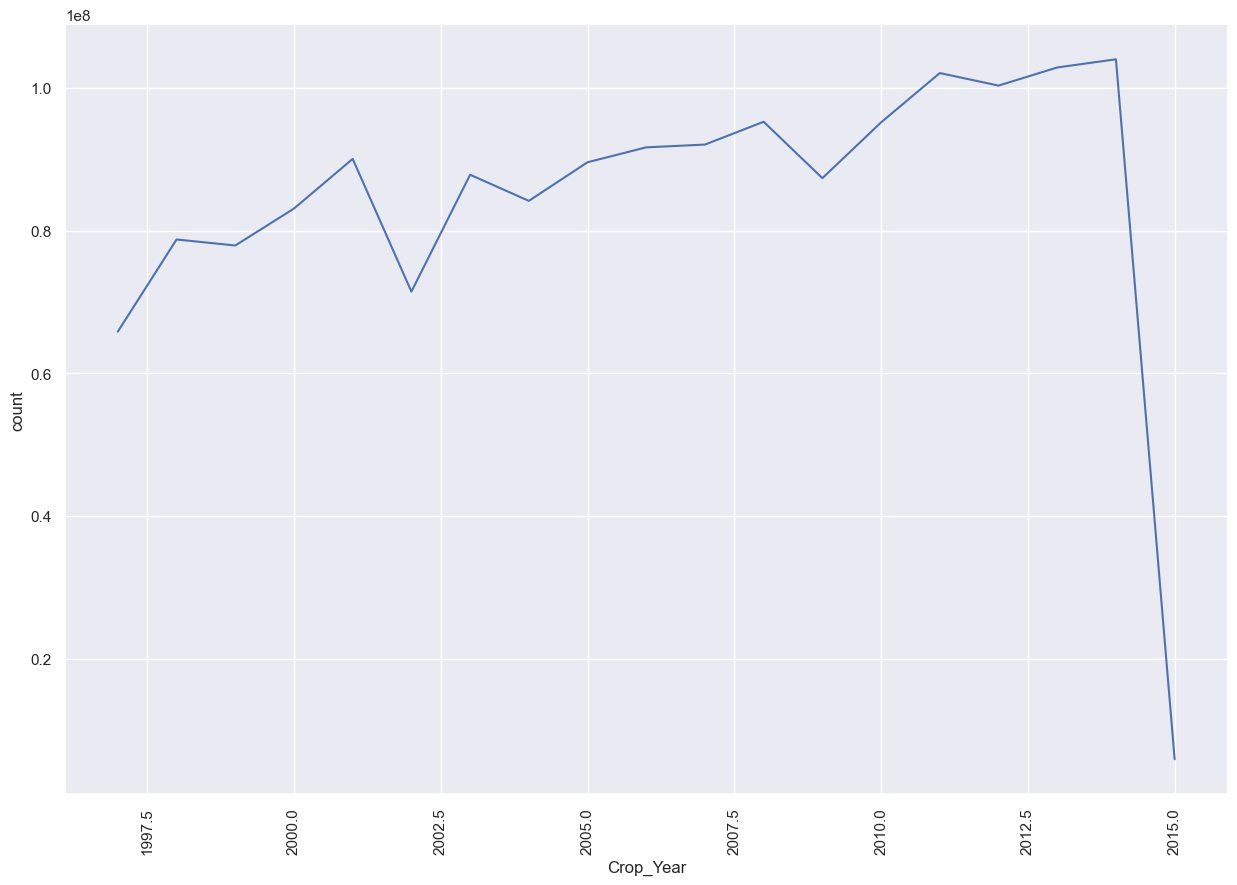

In [102]:
crop("Rice")

Production of Rice drastically decreases in post 2014

### Top 3 Crop in each Season

Top Crops by thier Production each season



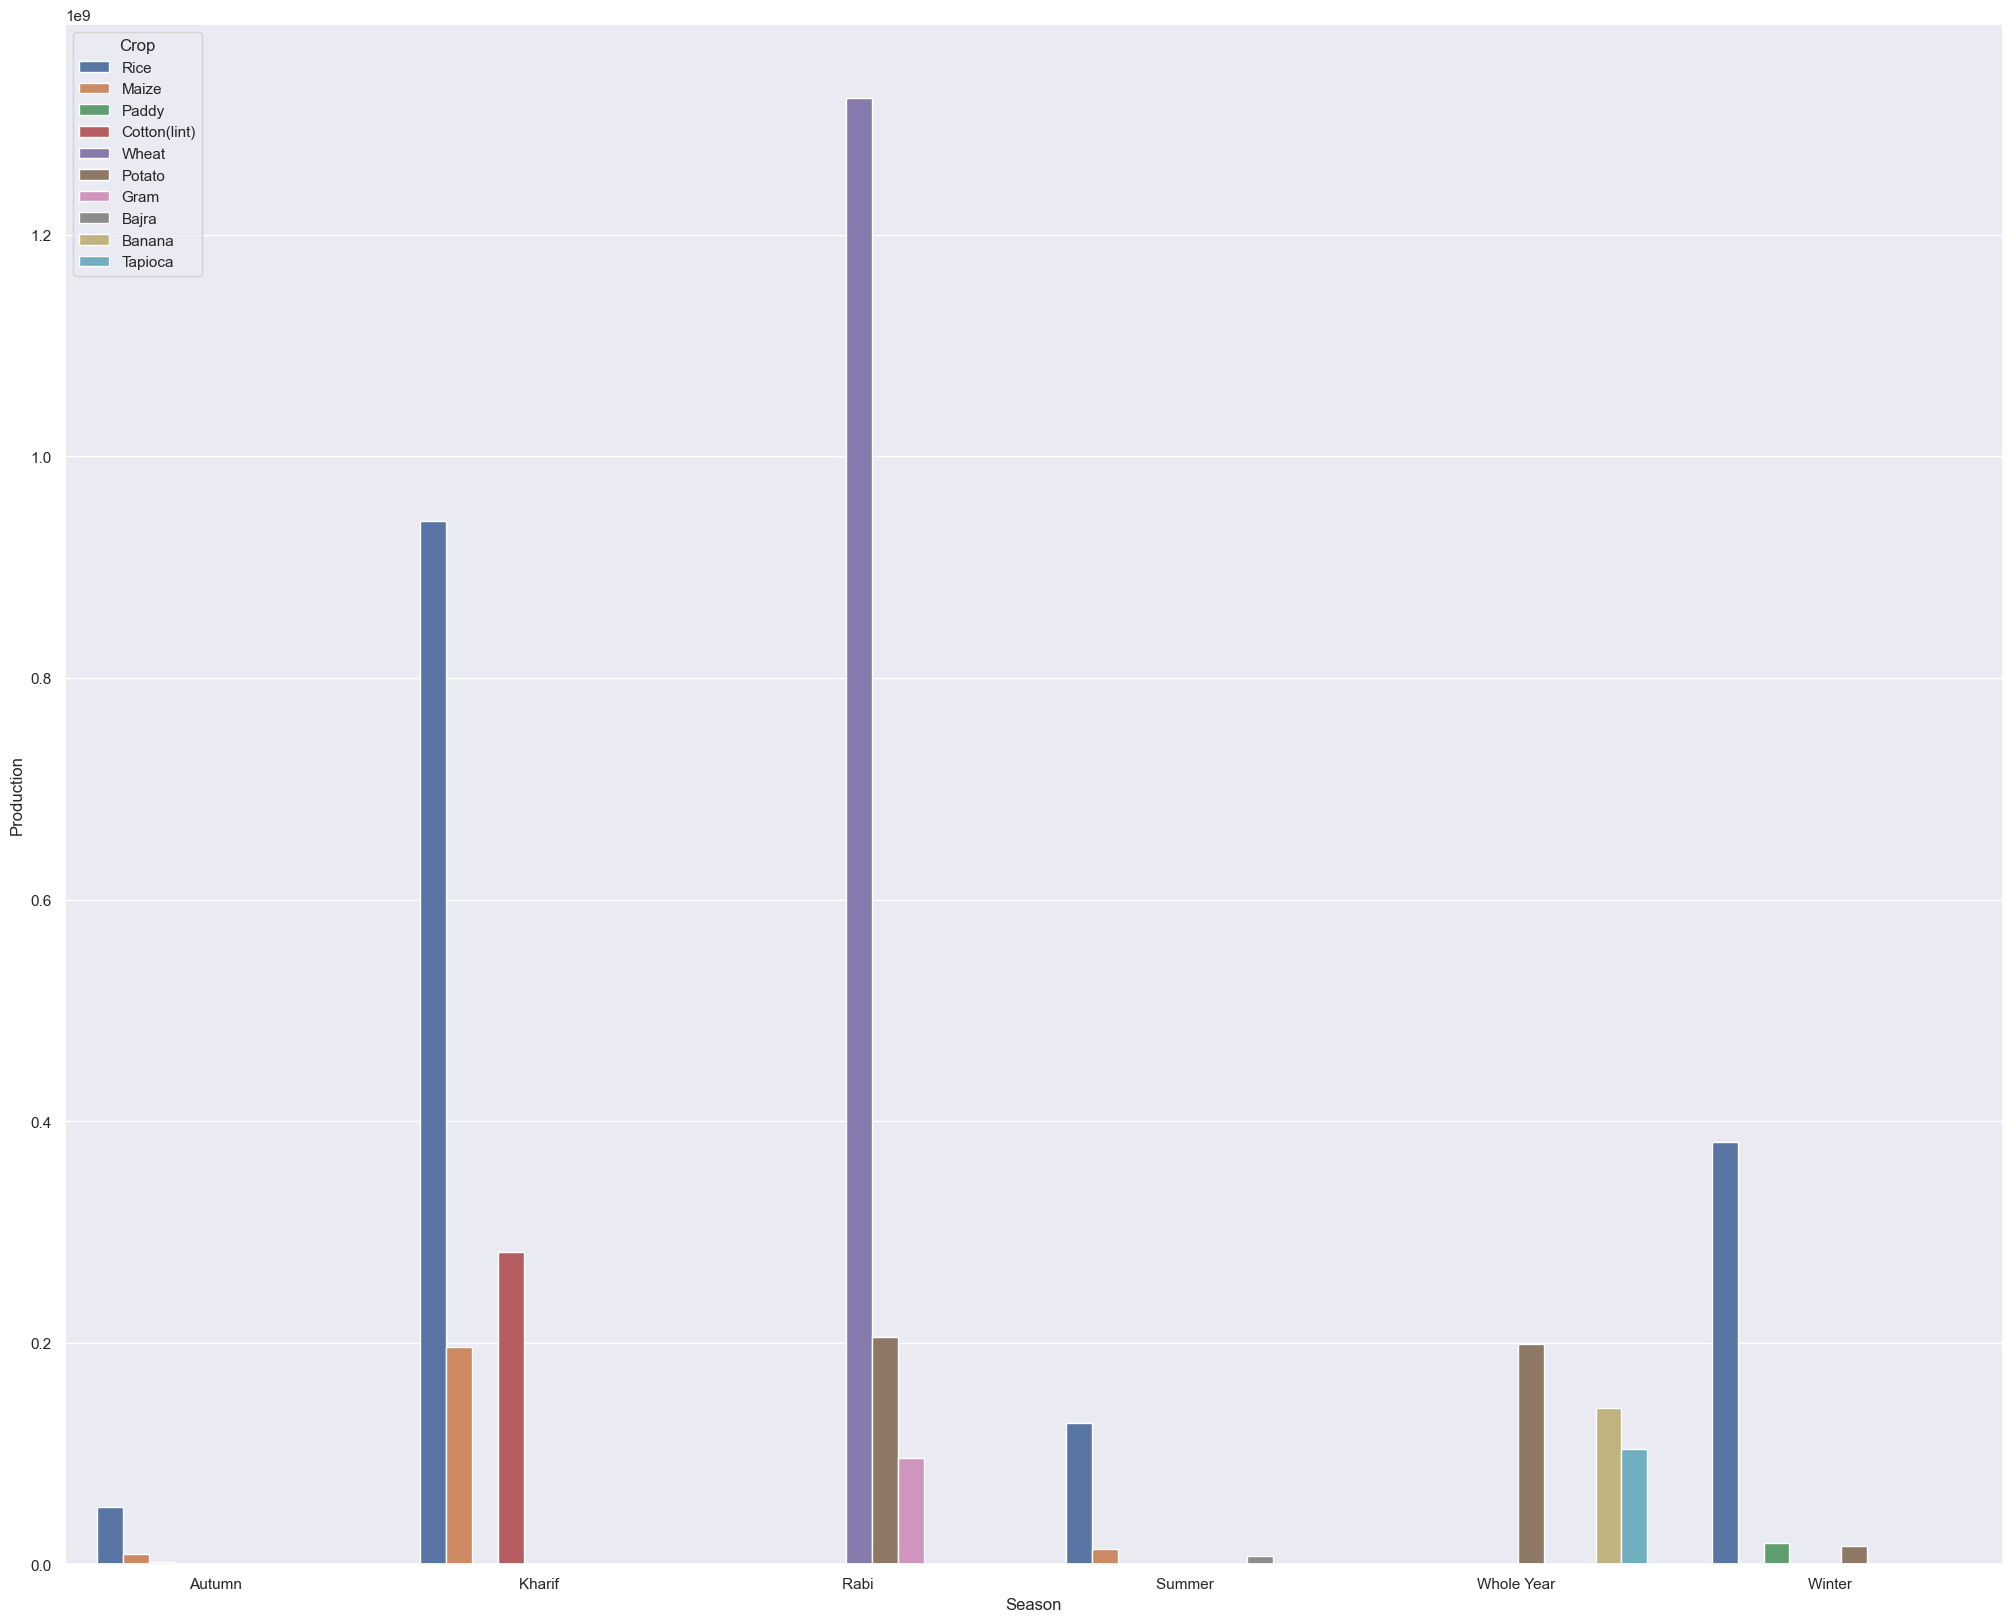

In [108]:
gg=ff.groupby(["Season","Crop"])["Production"].sum().to_frame().reset_index()
gg.sort_values(by=["Crop","Production"], ascending=False)
hh=gg.groupby("Season")["Crop","Production"].apply(lambda x:x.nlargest(3,columns=["Production"])).reset_index()
print("Top Crops by thier Production each season\n")
hh.drop(columns='level_1',inplace=True)
sns.barplot(data=hh,x='Season',y='Production',hue='Crop');

During Rabi season Production of wheat is all time high